In [1]:
# installing kaggle
! pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# configuring the path of kaggle.jason file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# importing twitter sentiment dataset
# API to fix the dataset from kaggle
! kaggle datasets download -d kazanova/sentiment140

In [ ]:
# extracting the compressed dataset from kaggle

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

 IMPORTING THE DEPENDENCIES

In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
# above is the natural language libraray
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer is used to convert the textual data into numeric data as we cannot use textual data in ml model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# LogisticRegression this is a ML model for training
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# printing the stopwords in English
print(stopwords.words('english'))
# stop words are the words which we do not require as below

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

DATA PROCESSING


In [8]:
# loading the data from csv file to pandas dataframe
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1')

In [9]:
# checking the number of rows and columns
twitter_data.shape
# here as you can see there are 16 lakhs tweets

(1599999, 6)

In [10]:
# printing the first five rows of data frame
twitter_data.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
# naming the columns and reading the dtaset again

column_names=['target' , 'ids' , 'date' , 'flag' ,'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=column_names, encoding = 'ISO-8859-1')

In [12]:
# checking the number of rows and columns
twitter_data.shape


(1600000, 6)

In [13]:
# printing the first five rows of data frame
twitter_data.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
# counting the number of missing values in the dataset
twitter_data.isnull().sum()
# as all values are 0 no daa is missing

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


In [15]:
# checking the distribution from target column
twitter_data['target'].value_counts()
# for 0 =negative twit,  4=positive twit

,count
target,
0,800000
4,800000


In [16]:
twitter_data.replace({'target': {4:1}} , inplace=True)
# here 4 is converted to 1

In [17]:
# checking the distribution from target column
twitter_data['target'].value_counts()
# for 0 =negative tweet,  1=positive tweet

,count
target,
0,800000
1,800000


In [ ]:
#check the distribution of target variable
plt.pie(data['target'].value_counts(),autopct='%2.f%%',labels=['Negative','Positive'])
plt.title('Distribution of Target variable')
plt.show() 


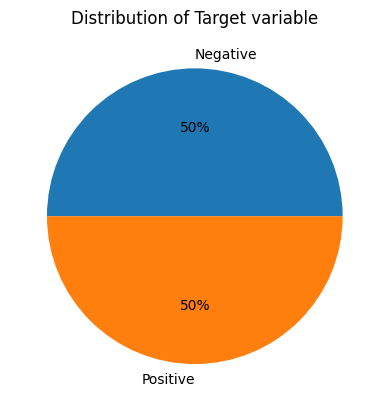


# 0 --> Negative Tweet🤕
# 1 --> Positive tweet🧑


# **STEMMING**

Stemming is a process of reducing a word to its Root word

example: actor,actress,acting =act
Here in above example the root word for actor,acting,actress is act. Hence we can use act instead of so many words

In [18]:
port_stem = PorterStemmer()

In [19]:
def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english') ]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content
    # converting in lowercase
  # removing all the things that is not letter as above condition

In [ ]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)
# text is the column were the comments are stored
# it requires 50 minutes to load

In [ ]:
# checking the number of rows and columns
twitter_data.shape


In [ ]:
# printing the first five rows of data frame
twitter_data.head()


In [ ]:
print(twitter_data['stemmed_content'])

In [ ]:
print(twitter_data['target'])

In [ ]:
from tkinter.constants import X
# separeating data and label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [ ]:
print(X)
# X are the sentences

In [ ]:
print(Y)
# Y denotes 0/1 i.e If the data is positive or negative

# *Splitting the data to training data and test data*

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size=0.2 , stratify = Y , random_state=2)
# distribution and proportion

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
# converting the textual data to numerical data

vectorizer =  TfidfVectorizer()

X_train =vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

#Training the machine learning model

#Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train , Y_train)

# ***Model Evaluation***

## Accuracy score

In [ ]:
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train , X_train_prediction)

In [ ]:
print('Acurracy score on the training data: ' , training_data_accuracy)

In [ ]:
#accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test , X_test_prediction)

In [ ]:
print('Acurracy score on the test data: ' , test_data_accuracy)

*accuracy* score on the test data


Model accuracy = 89.9%

##Saving the trained model

In [ ]:
import pickle

In [ ]:
file_name = 'trained_model.sav'
pickle.dump(model , open(filename , 'wb') )

#Using the saved model for future predictions

In [ ]:
# loadind the saved model
loaded_model = pickle.load()1:21:29

In [ ]:
X_new = X_test[200]
print(Y_test[200])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

In [ ]:
X_new = X_test[3]
print(Y_test[3])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

<!--  Converting 4 to 1 -->

<!-- Converting 4 to 1 -->